In [1]:
import pymatgen
from pymatgen.core.composition import Composition as pmcomp
from pymatgen.core.structure import Structure as pmstruc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Extracting data
doping_levels = ["0", "025", "05", "055", "06", "065", "07", "075", "08", "085", "09", "095", "1"]
doping_levels_num = [0, 0.25, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

prefix = "../../shape-relax-metallic/POSCAR-d"
suffix = ".vasp"
data = np.array([[], [], [], [], [], []])
for i in range(len(doping_levels)):
    # Parse POSCAR
    fname = prefix + doping_levels[i] + suffix
    struc = pmstruc.from_file(fname)
    
    # Store relevant data
    data = np.hstack([data,[[doping_levels_num[i]], [struc.lattice.a], [struc.lattice.b], [struc.lattice.c], 
               [struc.get_distance(0,2)], [struc.get_distance(2,4)]]])
    
# Add relevant data to dataframe
df = pd.DataFrame(np.transpose(data),columns = ['doping', 'a', 'b', 'c', 'ta-mg', 'ta-ta'])

# Calculating normalized c/a ratio
df['c/a'] = df.apply(lambda row: row.c/(3*row.a), axis=1)

# Calculating dimerization
df['dimer'] = df.apply(lambda row: (row['ta-mg']-row['ta-ta'])/(np.mean([row['ta-mg'],row['ta-ta']])), axis=1)

df

,doping,a,b,c,ta-mg,ta-ta,c/a,dimer
0,0.00,4.775155,4.775155,9.254292,3.072141,3.110010,0.646003,-0.012251
1,0.25,4.866340,4.866340,9.322411,3.080582,3.161247,0.638564,-0.025846
2,0.50,4.953775,4.953775,9.406409,3.103279,3.199850,0.632946,-0.030642
3,0.55,4.969133,4.969133,9.422243,3.108680,3.204883,0.632051,-0.030475
4,0.60,4.984681,4.984681,9.441548,3.117154,3.207241,0.631371,-0.028489
5,0.65,4.964777,4.964777,9.378115,3.212779,2.952557,0.629643,0.084415
6,0.70,4.985493,4.985493,9.373368,3.224212,2.924943,0.626709,0.097337
7,0.75,5.008796,5.008796,9.371684,3.235684,2.900316,0.623682,0.109312
8,0.80,5.029602,5.029602,9.371827,3.252592,2.866643,0.621111,0.126143
9,0.85,5.053137,5.053137,9.378186,3.270406,2.837374,0.618638,0.141797


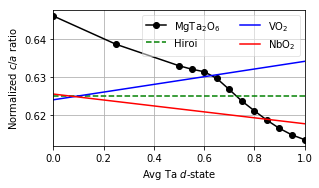

In [9]:
### Plotting c/a ###
WIDTH = 4.5
HEIGHT = 2.5
YLIMS = None
XLIMS = [0,1]
X_AXIS = 'Avg Ta $d$-state'
Y_AXIS = 'Normalized $c$/$a$ ratio'
fig = plt.figure(figsize=(WIDTH,HEIGHT))

plt.plot(df['doping'], df['c/a'], 'ko-',label="MgTa$_2$O$_6$")
plt.plot([0,1],[0.625,0.625] ,   'g--', label="Hiroi")
plt.plot([0,1],[0.624, 0.6341],  'b-',  label="VO$_2$")
plt.plot([0,1],[0.6255, 0.6177], 'r-',  label="NbO$_2$")


plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(loc='upper right',ncol=2, fancybox=True, framealpha=0.5) 
plt.show()

## Saving plot
fig.savefig('c-a_ratio_cdoped' + '.png', bbox_inches='tight', dpi=500)
fig.savefig('c-a_ratio_cdoped-vec' + '.pdf', bbox_inches='tight')

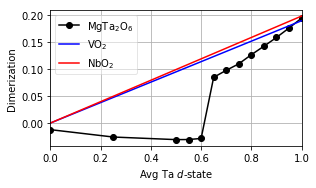

In [10]:
### Plotting dimer ###
WIDTH = 4.5
HEIGHT = 2.5
YLIMS = None
XLIMS = [0,1]
X_AXIS = 'Avg Ta $d$-state'
Y_AXIS = 'Dimerization'
fig = plt.figure(figsize=(WIDTH,HEIGHT))

def dimer(bonds):
    """
    Calculates the dimerization given two bond lengths
    """
    if len(bonds) != 2:
        raise InvalidArgumentError("Argument must be a list of 2 bond lengths.")
    diff = np.abs(bonds[0] - bonds[1])
    avg = np.mean(bonds)
    return diff/avg

nbo2_bonds = [[3.0315, 3.0315],[3.299, 2.706]]
nbo2_dimers = [dimer(nbo2_bonds[0]),dimer(nbo2_bonds[1])]
vo2_bonds =  [[2.8528, 2.8528],[3.1655, 2.6191]]
vo2_dimers = [dimer(vo2_bonds[0]),dimer(vo2_bonds[1])]


plt.plot(df['doping'], df['dimer'], 'ko-', label="MgTa$_2$O$_6$")
plt.plot([0,1],        vo2_dimers,  'b-',  label="VO$_2$")
plt.plot([0,1],        nbo2_dimers, 'r-',  label="NbO$_2$")


plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(loc='upper left', fancybox=True, framealpha=0.5) 
plt.show()

## Saving plot
fig.savefig('dimerization_cdoped' + '.png', bbox_inches='tight', dpi=500)
fig.savefig('dimerization_cdoped-vec' + '.pdf', bbox_inches='tight')

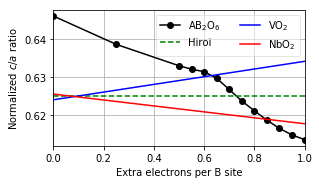

In [7]:
### Plotting c/a ###
WIDTH = 4.5
HEIGHT = 2.5
YLIMS = None
XLIMS = [0,1]
X_AXIS = 'Extra electrons per B site'
Y_AXIS = 'Normalized $c$/$a$ ratio'
fig = plt.figure(figsize=(WIDTH,HEIGHT))

plt.plot(df['doping'], df['c/a'], 'ko-',label="AB$_2$O$_6$")
plt.plot([0,1],[0.625,0.625] ,   'g--', label="Hiroi")
plt.plot([0,1],[0.624, 0.6341],  'b-',  label="VO$_2$")
plt.plot([0,1],[0.6255, 0.6177], 'r-',  label="NbO$_2$")


plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(loc='upper right',ncol=2, fancybox=True, framealpha=0.5) 
plt.show()

## Saving plot
fig.savefig('c-a_ratio_cdoped' + '-anon.png', bbox_inches='tight', dpi=500)

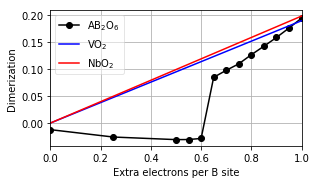

In [8]:
### Plotting dimer anonymized ###
WIDTH = 4.5
HEIGHT = 2.5
YLIMS = None
XLIMS = [0,1]
X_AXIS = 'Extra electrons per B site'
Y_AXIS = 'Dimerization'
fig = plt.figure(figsize=(WIDTH,HEIGHT))

def dimer(bonds):
    """
    Calculates the dimerization given two bond lengths
    """
    if len(bonds) != 2:
        raise InvalidArgumentError("Argument must be a list of 2 bond lengths.")
    diff = np.abs(bonds[0] - bonds[1])
    avg = np.mean(bonds)
    return diff/avg

nbo2_bonds = [[3.0315, 3.0315],[3.299, 2.706]]
nbo2_dimers = [dimer(nbo2_bonds[0]),dimer(nbo2_bonds[1])]
vo2_bonds =  [[2.8528, 2.8528],[3.1655, 2.6191]]
vo2_dimers = [dimer(vo2_bonds[0]),dimer(vo2_bonds[1])]


plt.plot(df['doping'], df['dimer'], 'ko-', label="AB$_2$O$_6$")
plt.plot([0,1],        vo2_dimers,  'b-',  label="VO$_2$")
plt.plot([0,1],        nbo2_dimers, 'r-',  label="NbO$_2$")


plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(loc='upper left', fancybox=True, framealpha=0.5) 
plt.show()

## Saving plot
fig.savefig('dimerization_cdoped' + '-anon.png', bbox_inches='tight', dpi=500)
